# Social Network - numpy

We will perform the Logistic regression for this Categorical Class Label. We will start the implmentation with Numpy.

# Import Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fetch Dataset

In [4]:
url = "https://raw.githubusercontent.com/git-to-aswin/ML-Model-Building/refs/heads/main/dataset/Social_Network_Ads.csv"
df = pd.read_csv(url)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# EDA

In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
df["Gender"].value_counts()

,count
Gender,
Female,204
Male,196


In [11]:
df["Purchased"].value_counts()

,count
Purchased,
0,257
1,143


# Data Visualisation

<Axes: ylabel='Frequency'>

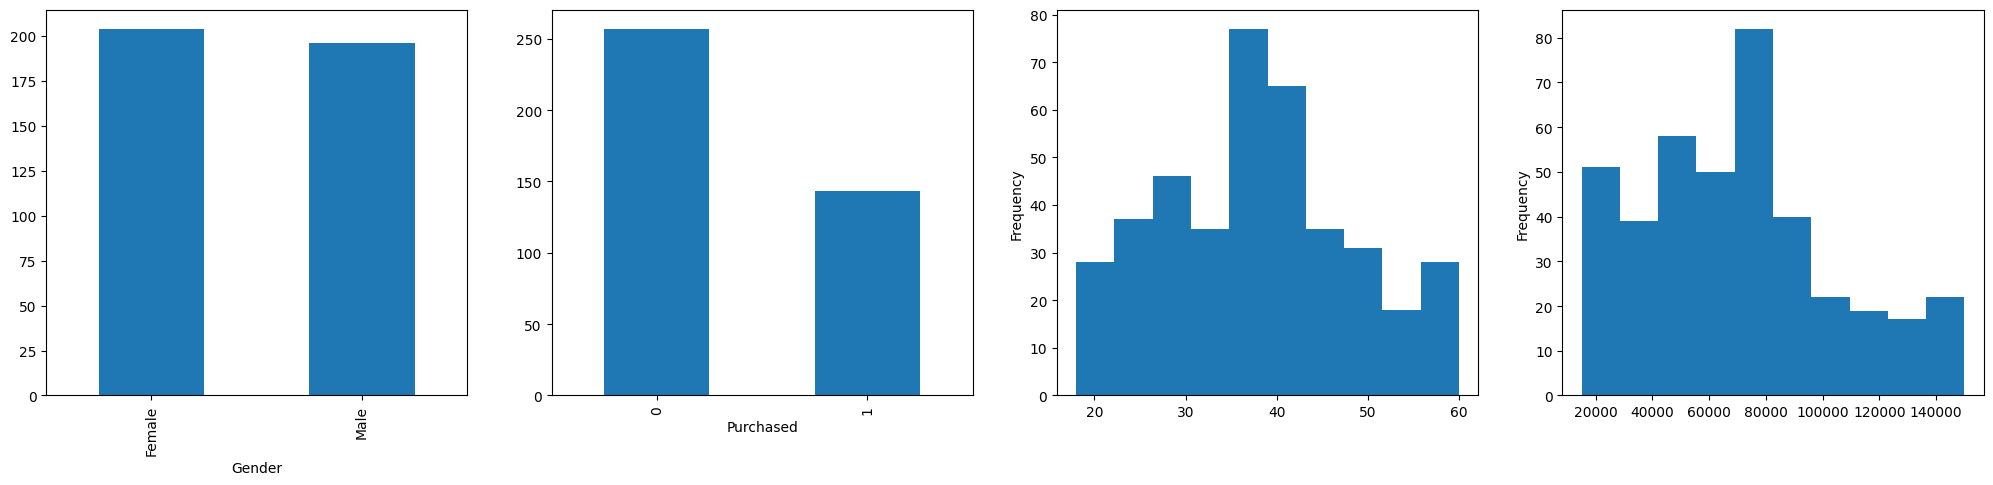

In [14]:
plt.figure(figsize=(25, 5))
plt.subplot(1, 4, 1)
df["Gender"].value_counts().plot(kind="bar")

plt.subplot(1, 4, 2)
df["Purchased"].value_counts().plot(kind="bar")

plt.subplot(1, 4, 3)
df["Age"].plot(kind="hist")

plt.subplot(1, 4, 4)
df["EstimatedSalary"].plot(kind="hist")

# Feature & Target

In [5]:
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values.reshape(-1, 1)

# Data Split

In [26]:
np.random.seed(42)

indices = np.random.permutation(len(X))
split = int(0.8 * len(X))

train_idx = indices[:split]
test_idx  = indices[split:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# Normalize features (IMPORTANT for GD)

In [27]:
X_mean = X_train.mean(axis=0)
X_std  = X_train.std(axis=0)

X_train = (X_train - X_mean) / X_std
X_test  = (X_test  - X_mean) / X_std

In [28]:
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test  = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Sigmoid Function

In [23]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Binary Cross-Entropy Loss

In [24]:
def binary_cross_entropy(y, y_pred):
    eps = 1e-9  # avoid log(0)
    return -np.mean(y * np.log(y_pred + eps) + (1 - y) * np.log(1 - y_pred + eps))

# Train Logistic Regression

In [29]:
n_samples, n_features = X_train.shape
weights = np.zeros((n_features, 1))

lr = 0.1
epochs = 2000

losses = []

for _ in range(epochs):
    z = X_train @ weights
    y_pred = sigmoid(z)

    error = y_pred - y_train
    grad = (1 / n_samples) * (X_train.T @ error)

    weights -= lr * grad

    loss = binary_cross_entropy(y_train, y_pred)
    losses.append(loss)

# Plot Loss curve

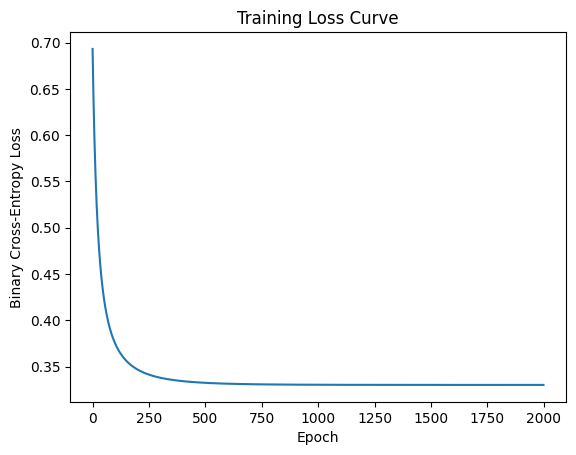

In [30]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Training Loss Curve")
plt.show()

# Prediction

In [31]:
def predict(X, weights, threshold=0.5):
    probs = sigmoid(X @ weights)
    return (probs >= threshold).astype(int)

In [32]:
y_test_pred = predict(X_test, weights)

In [33]:
accuracy = np.mean(y_test_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8625


# Visualize Decision Boundary

In [34]:
def plot_decision_boundary(X, y, weights):
    x_min, x_max = X[:,1].min()-1, X[:,1].max()+1
    y_min, y_max = X[:,2].min()-1, X[:,2].max()+1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    grid = np.c_[np.ones((xx.size, 1)), xx.ravel(), yy.ravel()]
    probs = sigmoid(grid @ weights).reshape(xx.shape)

    plt.contourf(xx, yy, probs, alpha=0.3)
    plt.scatter(X[:,1], X[:,2], c=y.flatten(), edgecolor='k')
    plt.xlabel("Age (normalized)")
    plt.ylabel("Salary (normalized)")
    plt.title("Decision Boundary")
    plt.show()

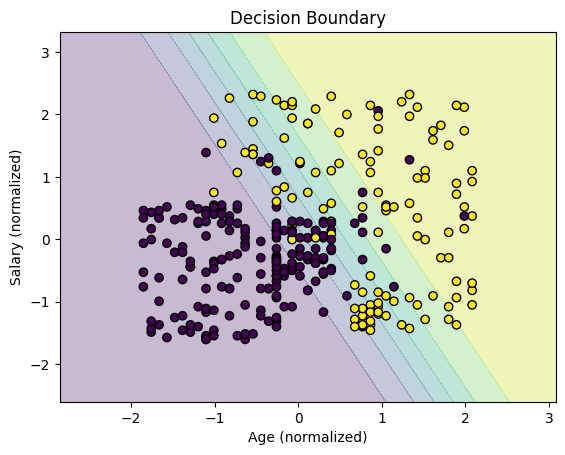

In [35]:
plot_decision_boundary(X_train, y_train, weights)